# Assignment 10 Answer - v2

- There are some lecture references in this document. They are notes to myself and can be ignored.

In [1]:
from IPython.display import display
import sympy as sp
import matplotlib.pyplot as plt

## Q1

- Lecture 237 S is a noncausal system
- Lecture 212 E^{At} = transition matrix

The system:

$x_1(t) = e^{3t} - 2te^{3t}$

May be generated by the system:

$A = \begin{bmatrix} 3 & 1 \\ 0 & 3 \end{bmatrix}$

with the initial conditions $(1, -2)$.

In [2]:
A = sp.Matrix([
    [3, 1],
    [0, 3]
])

In [3]:
t = sp.symbols('t')

y0 = sp.Matrix([1, -2])
y, dy = sp.exp(A*t)@y0
y

-2*t*exp(3*t) + exp(3*t)

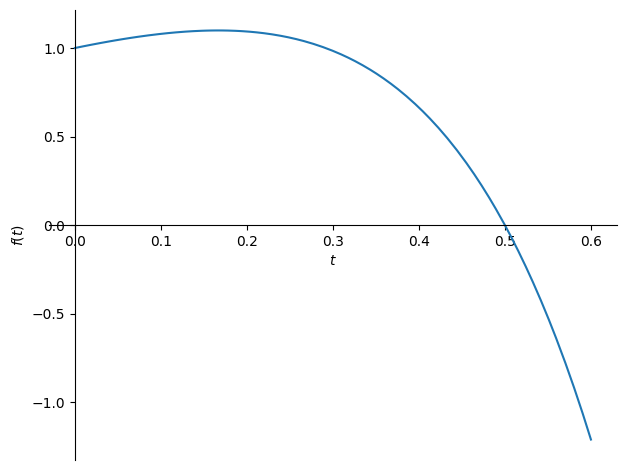

In [4]:
sp.plot(y, (t, 0, 0.6))
plt.show()

## Q2

Lecture 235 Partial fraction decompositions and free evolutions

- For $n>1$ the system is not diagonisable
- That means the system does not have a full set of independent eigenvectors.

Honestly i find the Jordan representation of this quite helpful in remembering:

$e^{At} = \begin{bmatrix} e^\lambda & te^\lambda & t^2e^\lambda \\
0 & e^\lambda & te^\lambda \\
0 & 0 & e^\lambda \end{bmatrix}$


## Q3

### 1

I will create the two separate systems, then combine them.

#### Fastly decaying oscillatory behaviour:

This system should be a damped harmonic oscillator:

$\ddot{x} + 2\zeta\omega_0\dot{x} + \omega_0^2x = 0$

$\ddot{x} = - 2\zeta\omega_0\dot{x} - \omega_0^2x$

$\vec{x} = \begin{bmatrix} x \\ \dot{x} \end{bmatrix}$

$A = \begin{bmatrix} 0 & 1 \\ -\omega_0^2 & -2\zeta\omega_0 \end{bmatrix}$

In [5]:
def create_oscilator(damping, frequency):
    zeta = damping
    omega = frequency*2*sp.pi
    return sp.Matrix([
        [0, 1],
        [-omega**2, -2*zeta*omega]
    ]).applyfunc(sp.simplify)

In [6]:
A = create_oscilator(0.07, 1)
A

Matrix([
[       0,        1],
[-4*pi**2, -0.28*pi]])

The free evolution of the system is given by:

$\vec{x}(t) = e^{At}\vec{x}(0)$

where $e^{At}$ is the transition matrix given by the taylor series.

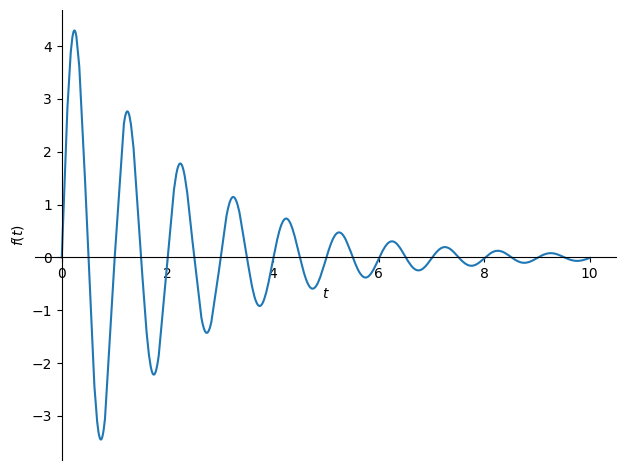

In [7]:
t = sp.symbols('t')

# Adjusts the amplitude which is affected by the damping
gain = 30
x0 = sp.Matrix([0, gain])
x = sp.exp(A*t)@x0

x1 = x[0]

sp.plot(x1, (t, 0, 10))
plt.show()

#### Slowly decaying exponential:

This is a simple first order exponential decay:

$\dot{x} = -\lambda x$

The free evolution is given by:

$x(t) = e^{-\lambda t}x(0)$

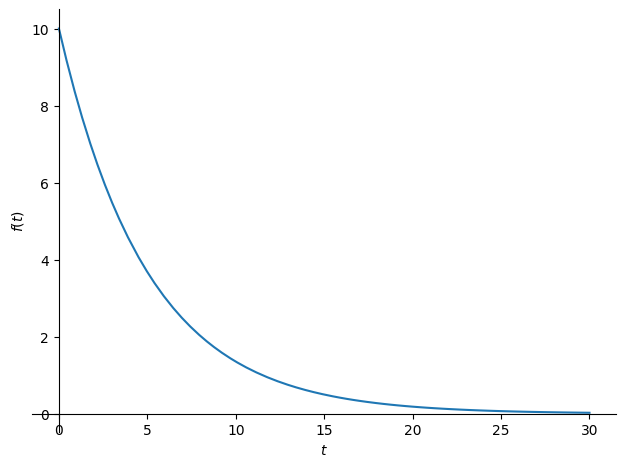

In [8]:
x0 = 10
lambda1 = 1/5
sp.plot(x0*sp.exp(-lambda1*t), (t, 0, 30))
plt.show()

Combine them:

These are two independent systems, so their free evolutions must remain separate. A separate state must represent the linear combination.

Creating a new state $x_1$ that is driven by the derivatives of the two systems:

$x_1$: The combined state \
$x_2$: The state of the first order system \
$x_3$: The state of the second order system \
$x_4$: $\dot{x_3}$

$\dot{x_1} = \dot{x_2} + \dot{x_3}$

$\dot{x_2} = -\lambda x_2$

$\dot{x_3} = x_4$

$\dot{x_4} = -2\zeta\omega_0x_4 - \omega_0^2x_3$

$A = \begin{bmatrix}
0 & -\lambda & 0 & 1 \\
0 & -\lambda & 0 & 0 \\ 
0 & 0 & 0 & 1 \\
0 & 0 & -\omega_0^2 & -2\zeta\omega_0
\end{bmatrix}$

In [9]:
def create_model(tau, damping, frequency):
    
    A = sp.Matrix([
        [0, -tau, 0, 1],
        [0, -tau, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        
    ])
    A[2,2] = create_oscilator(damping, frequency)
    
    return A.applyfunc(sp.simplify)

In [10]:
A = create_model(1/5, 0.07, 1)
A

Matrix([
[0, -0.2,        0,        1],
[0, -0.2,        0,        0],
[0,    0,        0,        1],
[0,    0, -4*pi**2, -0.28*pi]])

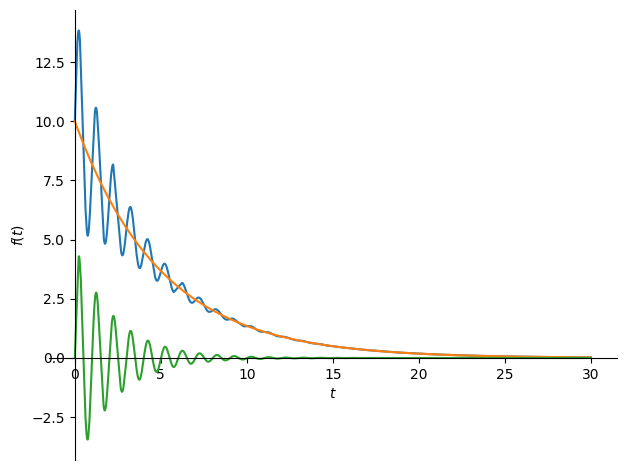

In [11]:
# Adjusts the amplitude which is affected by the damping
y0 = 10
gain = 30
x0 = sp.Matrix([y0, y0, 0, gain])
x1, x2, x3, x4 = sp.exp(A*t)@x0

sp.plot(x1, x2, x3, (t, 0, 30))
plt.show()

The plot above shows a system with a fastly vanishing oscillatory behavior on top of a slowly vanishing exponential decay.

### 2

The poles are the solutions for $s$ in the polynomial of the denominator.

In [12]:
def characteristic(matrix):
    I = sp.eye(matrix.shape[0])
    M = matrix - sp.symbols('s')*I
    return M.det()

In [13]:
characteristic(A)

-s*(-s - 0.2)*(s**2 + 0.28*pi*s + 4*pi**2)

S has the solutions:

In [14]:
solutions = sp.solve(characteristic(A))

for solution in solutions:
    display(sp.Eq(sp.symbols('s'), solution))

Eq(s, -0.2)

Eq(s, 0.0)

Eq(s, -0.439822971502571 - 6.26777259942446*I)

Eq(s, -0.439822971502571 + 6.26777259942446*I)

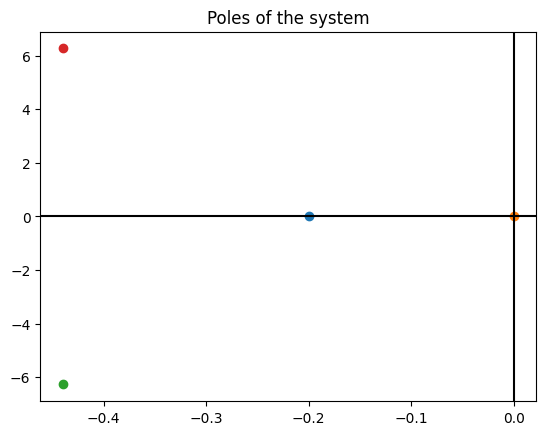

In [15]:
for pole in solutions:
    if type(pole) == 'sympy.core.numbers.Float':
        p = (pole, 0)
    else:
        p = pole.as_real_imag()
    plt.scatter(*p)
    
plt.axhline(0, color='k')
plt.axvline(0, color='k')
plt.title("Poles of the system")
plt.show()

### 3

The amplitude can be changed by increasing or decreasing the gain of the system, which is $x_4(0)$.
Below is an example of different gains when the system is undamped:

In [16]:
def simulate_undamped(gain):
    A = create_model(0, 0, 1/4)
    x0 = sp.Matrix([0, 0, 0, gain])
    x = sp.exp(A*t)@x0
    return x[0]

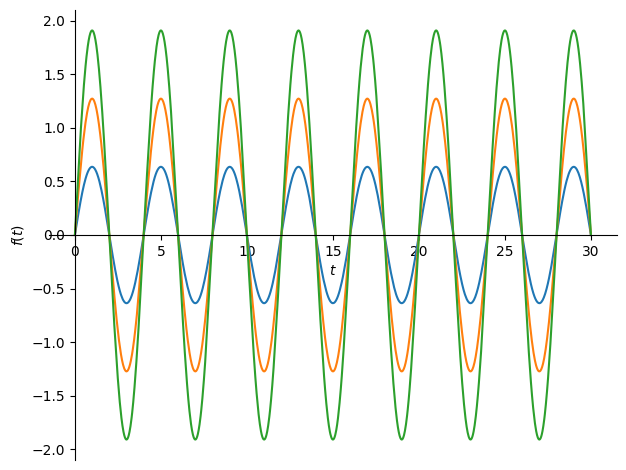

In [17]:
sp.plot(
    simulate_undamped(gain=1),
    simulate_undamped(gain=2),
    simulate_undamped(gain=3),
    (t, 0, 30),
)

plt.show()